In [56]:
import pypsa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


import pypsa_helpers as ph
import importlib

ph = importlib.reload(ph)


In [57]:
demand_nodes=pd.read_csv(r"C:\Users\vcane\OneDrive - Harvard University\@ES215\es215\3_real_map\nodes_demand.csv")
distrib_nodes = pd.read_csv(r"C:\Users\vcane\OneDrive - Harvard University\@ES215\es215\3_real_map\nodes_supply.csv")

In [58]:
demand_nodes=demand_nodes[["cluster_id","x_km_shift", "y_km_shift", 'scaled_demand']].iloc[:-1]
demand_nodes["cluster_id"] = demand_nodes["cluster_id"].astype(float).astype(int)
distrib_nodes=distrib_nodes[["node_id", "node_type", "x_km_shift", "y_km_shift", "scaled_supply"]]

In [67]:
np.sum(demand_nodes["scaled_demand"].values)/np.sum(distrib_nodes["scaled_supply"].values)

np.float64(3.5645366993028973)

In [66]:
np.sum(distrib_nodes["scaled_supply"].values)

np.float64(34.0)

In [103]:
demand_nodes["loc"] = list(zip(demand_nodes["x_km_shift"], demand_nodes["y_km_shift"]))
demand_nodes["load"] = demand_nodes["scaled_demand"]/4
demand_nodes["p_nom_combustion"] = 1000
demand_nodes["combustion_efficiency"]=0.22

distrib_nodes["loc"] = list(zip(distrib_nodes["x_km_shift"], distrib_nodes["y_km_shift"]))


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 194 primals, 456 duals
Objective: 3.34e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.


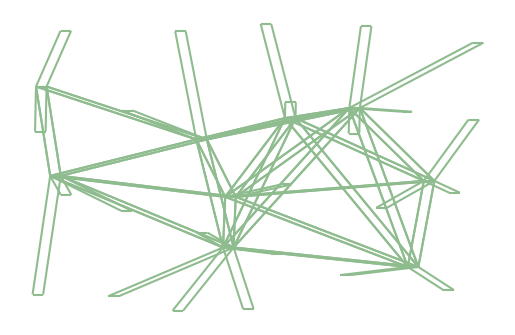

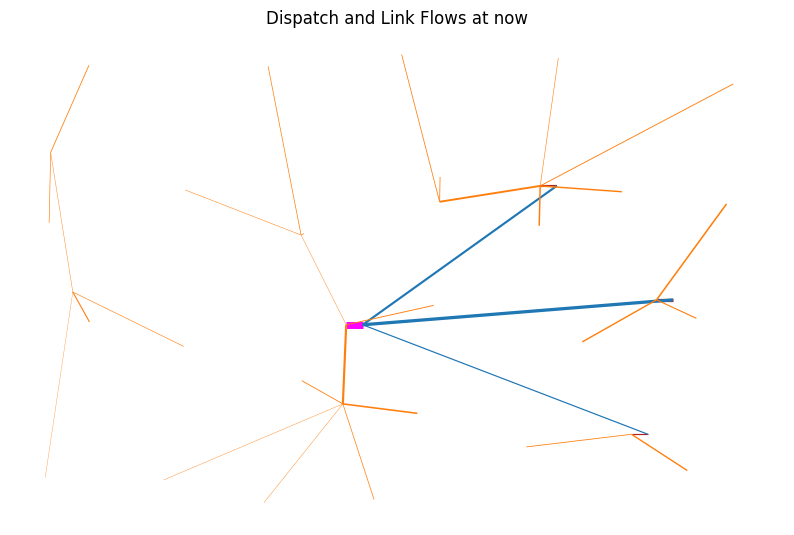

In [104]:
n=ph.build_network(distrib_nodes, demand_nodes, plotbool=True, link_radius2=4000000, electric_line_loss_decay=1e-4, fuel_line_loss_decay=5e-6,
                 electrolysis_efficiency=0.95, combustion_efficiency=0.95)